# Get the Data
In the following cells we download and save the S&P 500 dataset.
### Step 1 :
Define a function to get historical data from google finance

In [1]:
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

In [2]:
stock = raw_input("Observe the market(select an option from below): \n 1. Dow Jones(DJ) \n 2. NYSE COMPOSITE  \n 3. S&P 500\n")
period = raw_input("Select time period(In years):")

In [3]:
if stock == '1':
    param = {
        'q': ".DJI", # Stock symbol (ex: "AAPL")
        'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "INDEXDJX", # Stock exchange symbol on which stock is traded (ex: "NASD")
        'p': period+'Y' # Period (Ex: "1Y" = 1 year)
    }
    print ("Calculating results for Dow Jones stock market")
elif stock == '2':
    param = {
        'q': ".NYA", # Stock symbol (ex: "AAPL")
        'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "INDEXNYSEGIS", # Stock exchange symbol on which stock is traded (ex: "NASD")
        'p': period+'Y' # Period (Ex: "1Y" = 1 year)
    }
    print ("Calculating results for NYSE COMPOSITE (DJ) stock market")
elif stock == '3':
    param = {
        'q': ".INX", # Stock symbol (ex: "AAPL")
        'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "INDEXSP", # Stock exchange symbol on which stock is traded (ex: "NASD")
        'p': period+'Y' # Period (Ex: "1Y" = 1 year)
    }
    print ("Calculating results for S&P 500 stock market")
else:
    param = {
        'q': ".INX", # Stock symbol (ex: "AAPL")
        'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "INDEXSP", # Stock exchange symbol on which stock is traded (ex: "NASD")
        'p': period+'Y' # Period (Ex: "1Y" = 1 year)
    }
    print ("Wrong Input!! Calculating for S&P 500 stock market")

Calculating results for S&P 500 stock market


### Step 2: 
get the data of desired firm from Stooq static data provider.

In [4]:
data = get_price_data(param)
print(data)

                        Open     High      Low    Close      Volume
2008-05-02 20:00:00  1413.60  1422.72  1406.25  1413.90           0
2008-05-05 20:00:00  1412.77  1415.70  1404.37  1407.49           0
2008-05-06 20:00:00  1405.60  1421.57  1397.10  1418.26           0
2008-05-07 20:00:00  1417.49  1419.54  1391.16  1392.57           0
2008-05-08 20:00:00  1394.29  1402.35  1389.39  1397.68           0
2008-05-09 20:00:00  1394.90  1394.90  1384.11  1388.28           0
2008-05-12 20:00:00  1389.40  1404.06  1386.20  1403.58           0
2008-05-13 20:00:00  1404.40  1406.30  1396.26  1403.04           0
2008-05-14 20:00:00  1405.65  1420.19  1405.65  1408.66           0
2008-05-15 20:00:00  1408.36  1424.40  1406.87  1423.57           0
2008-05-16 20:00:00  1423.89  1425.82  1414.35  1425.35           0
2008-05-19 20:00:00  1425.28  1440.24  1421.63  1426.63           0
2008-05-20 20:00:00  1424.49  1424.49  1409.09  1413.40           0
2008-05-21 20:00:00  1414.06  1419.12  1388.81  

In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,1655.957967,1665.374590,1646.740322,1657.700644,6.153453e+08
std,519.890614,518.592548,519.204501,518.094507,6.852646e+08
min,0.000000,0.000000,0.000000,676.530000,0.000000e+00
25%,1224.607500,1238.055000,1213.632500,1224.877500,0.000000e+00
50%,1588.695000,1597.000000,1580.625000,1590.640000,5.082887e+08
75%,2076.867500,2083.972500,2065.077500,2077.332500,6.732611e+08
max,2867.230000,2872.870000,2851.480000,2872.870000,4.024144e+09


### Step 3: 
Write the data to a csv file.

In [6]:
data.to_csv('google.csv',index = False)

## Preprocess the data
### Step 1 : 
Get the data from csv file.

In [7]:
import numpy as np
import pandas as pd

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))

      Open     High      Low    Close  Volume
0  1413.60  1422.72  1406.25  1413.90       0
1  1412.77  1415.70  1404.37  1407.49       0
2  1405.60  1421.57  1397.10  1418.26       0
3  1417.49  1419.54  1391.16  1392.57       0
4  1394.29  1402.35  1389.39  1397.68       0


('Open   --- mean :', 1655.957967382657, '  \t Std: ', 519.7872046802319, '  \t Max: ', 2867.23, '  \t Min: ', 0.0)
('High   --- mean :', 1665.3745902943517, '  \t Std: ', 518.4893963990901, '  \t Max: ', 2872.87, '  \t Min: ', 0.0)
('Low    --- mean :', 1646.740322195704, '  \t Std: ', 519.1012284919132, '  \t Max: ', 2851.48, '  \t Min: ', 0.0)
('Close  --- mean :', 1657.700644391408, '  \t Std: ', 517.9914545186994, '  \t Max: ', 2872.87, '  \t Min: ', 676.53)
('Volume --- mean :', 615345319.5918854, '  \t Std: ', 685128262.4952804, '  \t Max: ', 4024143782, '  \t Min: ', 0)


### Step 2 : 
Remove Unncessary data, i.e., Date and High value

In [8]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler
import math

In [9]:
def remove_data(data):
    """
    Remove columns from the data
    :param data: a record of all the stock prices with columns as  ['Date','Open','High','Low','Close','Volume']
    :return: a DataFrame with columns as  ['index','Open','Close','Volume']
    """
    # Define columns of data to keep from historical stock data
    item = []
    open = []
    close = []
    volume = []

    # Loop through the stock data objects backwards and store factors we want to keep
    i_counter = 0
    for i in range(len(data) - 1, -1, -1):
        item.append(i_counter)
        open.append(data['Open'][i])
        close.append(data['Close'][i])
        volume.append(data['Volume'][i])
        i_counter += 1

    # Create a data frame for stock data
    stocks = pd.DataFrame()

    # Add factors to data frame
    stocks['Item'] = item
    stocks['Open'] = open
    stocks['Close'] = pd.to_numeric(close)
    stocks['Volume'] = pd.to_numeric(volume)

    # return new formatted data
    return stocks

In [10]:
stocks = remove_data(data)

#Print the dataframe head and tail

print(stocks.head())
print("---")
print(stocks.tail())

   Item     Open    Close      Volume
0     0  2675.05  2648.05  2335651561
1     1  2675.47  2669.91  2104565445
2     2  2651.65  2666.94  2543293987
3     3  2634.92  2639.40  2203579981
4     4  2680.80  2634.56  2413969096
---
      Item     Open    Close  Volume
2509  2509  1394.29  1397.68       0
2510  2510  1417.49  1392.57       0
2511  2511  1405.60  1418.26       0
2512  2512  1412.77  1407.49       0
2513  2513  1413.60  1413.90       0


### Step 2:
Visualise raw data.

In [11]:
import visualize

visualize.plot_basic(stocks)

<Figure size 1800x1200 with 1 Axes>

### Step 3 :
Normalise the data using minmaxscaler function

In [12]:
import preprocess_data as ppd

In [13]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.932974  0.897639  0.580410
1     1  0.933120  0.907592  0.522985
2     2  0.924812  0.906239  0.632009
3     3  0.918978  0.893700  0.547590
4     4  0.934979  0.891497  0.599871


('Open   --- mean :', 0.5775462615076772, '  \t Std: ', 0.18128549320432333, '  \t Max: ', 1.0, '  \t Min: ', 0.0)
('Close  --- mean :', 0.4467298525690049, '  \t Std: ', 0.23584301816599404, '  \t Max: ', 1.0, '  \t Min: ', 0.0)
('Volume --- mean :', 0.1529133532316429, '  \t Std: ', 0.17025441922822443, '  \t Max: ', 1.0, '  \t Min: ', 0.0)


### Step 4 : 
Visualize the data again

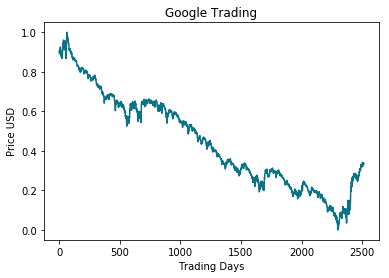

In [14]:
visualize.plot_basic(stocks)

### Step 5:
Log the normalised data for future resuablilty

In [15]:
stocks.to_csv('google_preprocessed.csv',index= False)

#  Simple linear regression model
#### Step 1: 
Load the preprocessed data

In [16]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.932974,0.897639,0.580410
1,1,0.933120,0.907592,0.522985
2,2,0.924812,0.906239,0.632009
3,3,0.918978,0.893700,0.547590
4,4,0.934979,0.891497,0.599871


#### Step 2: 
Split data into train and test pair

In [17]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

('x_train', (1723, 1))
('y_train', (1723, 1))
('x_test', (791, 1))
('y_test', (791, 1))


#### Step 3: 
Train a Linear regressor model on training set and get prediction

In [18]:
model = LinearRegressionModel.build_model(X_train,y_train)

#### Step 4: 
Get prediction on test set

In [19]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

#### Step 5: 
Plot the predicted values against actual

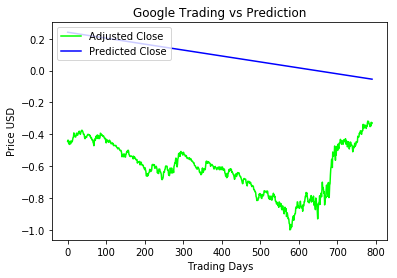

In [20]:
vs.plot_prediction(y_test,predictions)

#### Step 6: 
measure accuracy of the prediction

In [21]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.7877 MSE (0.8875 RMSE)
Test Score: 0.51226856 MSE (0.71572939 RMSE)


# Long-Short Term Memory Model
#### Step 1 : 
import keras libraries for smooth implementaion of lstm

In [22]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


,Open,Close,Volume
0,0.932974,0.897639,0.580410
1,0.933120,0.907592,0.522985
2,0.924812,0.906239,0.632009
3,0.918978,0.893700,0.547590
4,0.934979,0.891497,0.599871


#### Step 2 : 
Split train and test data sets and Unroll train and test data for lstm model

In [23]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 10
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

('x_train', (1998, 10, 3))
('y_train', (1998,))
('x_test', (486, 10, 3))
('y_test', (486,))


#### Step 3 : 
Build a basic Long-Short Term Memory model

In [24]:
from keras import optimizers

In [25]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()

model.compile(loss='mean_squared_error', optimizer='adam')
print("compilation time :", time.time() - start)

('compilation time :', 0.022433042526245117)


#### Step 4: 
Train the model

In [26]:
model.fit(X_train, y_train, batch_size=128, epochs=1, validation_split=0.05)

Train on 1898 samples, validate on 100 samples
Epoch 1/1
1898/1898 [==============================] - 1s 778us/step - loss: 0.1217 - val_loss: 0.0668


#### Step 5: 
Make prediction using test data

In [27]:
predictions = model.predict(X_test)

#### Step 6: 
Plot the results

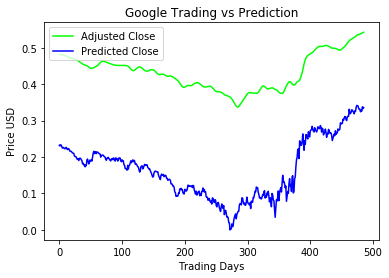

In [28]:
vs.plot_lstm_prediction(predictions, y_test)

#### Step 7: 
Get the test score.

In [29]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.03999493 MSE (0.19998733 RMSE)
Test Score: 0.07217106 MSE (0.26864673 RMSE)


In [30]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
#delta_price = RMSE * range % true_delta
print(true_delta)

0.07217106296692366
